# **Air Quality Comparator**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

In [1]:
import pandas as pd

df = pd.read_csv(r'../data/air_brum_bris.csv')

df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df[['nox', 'no2', 'no']] = df[['nox', 'no2', 'no']].interpolate(method='time', limit_direction='both')


print(df[['nox', 'no2', 'no']].isna().sum())

nox    0
no2    0
no     0
dtype: int64


In [2]:
df[['nox', 'no2', 'no']].head()


,nox,no2,no
date,,,
2016-09-09 00:00:00,4.48864,4.02390,0.30309
2016-09-09 01:00:00,3.42481,2.72866,0.45402
2016-09-09 02:00:00,3.77241,3.24982,0.34083
2016-09-09 03:00:00,4.81807,4.35333,0.30309
2016-09-09 04:00:00,6.38488,5.68778,0.45464


array([[<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'no2'}>,
        <Axes: title={'center': 'no'}>]], dtype=object)

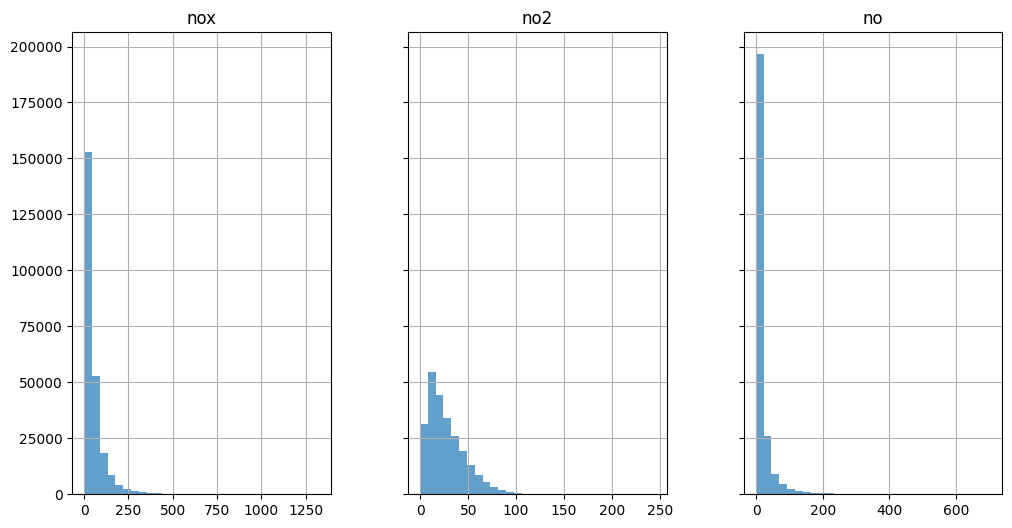

In [3]:
df[['nox', 'no2', 'no']].hist(bins=30, figsize=(12, 6), alpha=0.7, layout=(1, 3), sharey=True)  

<Axes: title={'center': 'Nitrogen Oxides Levels in Birmingham and Bristol (2016-2020)'}, xlabel='date'>

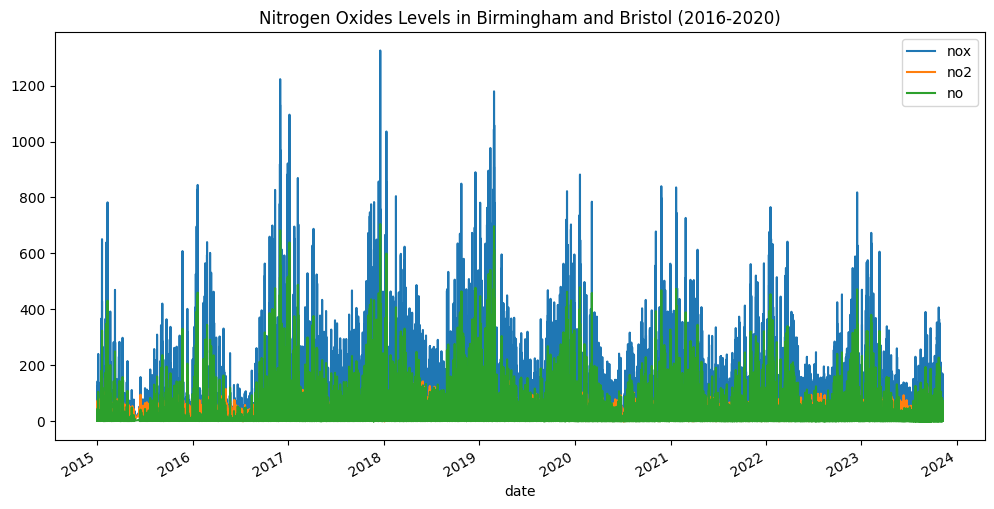

In [4]:
df[['nox', 'no2', 'no']].plot(title='Nitrogen Oxides Levels in Birmingham and Bristol (2016-2020)', figsize=(12, 6))    


In [5]:
df.columns


Index(['Unnamed: 0', 'site', 'code', 'co', 'nox', 'no2', 'no', 'o3', 'so2',
       'pm10', 'pm2.5', 'v10', 'v2.5', 'nv10', 'nv2.5', 'ws', 'wd', 'air_temp',
       'latitude', 'longitude', 'site_type'],
      dtype='object')

In [6]:
print(df.shape)

(243840, 21)


In [14]:
df.index.year.unique()
df_2023_06_22_29 = df[(df.index >= '2023-06-22 00:00:00') & (df.index <= '2023-06-29 23:59:59')]
df_2023_06_22_29.head()

,Unnamed: 0,site,code,co,nox,no2,no,o3,so2,pm10,...,v10,v2.5,nv10,nv2.5,ws,wd,air_temp,latitude,longitude,site_type
date,,,,,,,,,,,,,,,,,,,,,
2023-06-22 00:00:00,922825,Birmingham A4540 Roadside,BIRR,NaN,53.34920,47.69207,3.68949,4.98925,NaN,12.075,...,NaN,NaN,NaN,NaN,1.4,279.7,12.5,52.476145,-1.874978,Urban Traffic
2023-06-22 01:00:00,922826,Birmingham A4540 Roadside,BIRR,NaN,46.01455,37.70345,5.42036,15.89908,NaN,10.775,...,NaN,NaN,NaN,NaN,1.5,293.1,12.0,52.476145,-1.874978,Urban Traffic
2023-06-22 02:00:00,922827,Birmingham A4540 Roadside,BIRR,NaN,29.94405,18.99646,7.13984,39.31529,NaN,10.750,...,NaN,NaN,NaN,NaN,1.0,310.3,11.2,52.476145,-1.874978,Urban Traffic
2023-06-22 03:00:00,922828,Birmingham A4540 Roadside,BIRR,NaN,38.29933,24.88983,8.74545,28.43873,NaN,12.000,...,NaN,NaN,NaN,NaN,1.6,326.0,11.7,52.476145,-1.874978,Urban Traffic
2023-06-22 04:00:00,922829,Birmingham A4540 Roadside,BIRR,NaN,51.42904,29.37670,14.38216,19.70754,NaN,16.675,...,NaN,NaN,NaN,NaN,1.5,332.1,11.4,52.476145,-1.874978,Urban Traffic


In [15]:
df_2023_06_22_29.to_csv(r'../data/air_brum_bris_2023_06_22_29.csv')


In [13]:
df_2023_06_22_29 = df[(df['date'] >= '2023-06-22 00:00:00') & (df['date'] <= '2023-06-29 23:59:59')]
df_2023_06_22_29.head()

KeyError: 'date'

In [ ]:
print(df[['nox', 'no2', 'no']].describe())
df[['nox', 'no2', 'no']].boxplot(figsize=(8, 6))
import matplotlib.pyplot as plt
plt.title('Boxplot of Nitrogen Oxides Levels in Birmingham and Bristol (2016-2020)')
plt.ylabel('Concentration (µg/m³)')
plt.show()


In [ ]:
print(df[['nox', 'no2', 'no']].corr())
import seaborn as sns
sns.heatmap(df[['nox', 'no2', 'no']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Nitrogen Oxides Levels')
plt.show()

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [ ]:
import os
current_dir = os.getcwd()
current_dir

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [ ]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

Confirm the new current directory

In [ ]:
current_dir = os.getcwd()
current_dir

# Section 1

Section 1 content

---

# Section 2

Section 2 content

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
